## Python - Predicting the risk of diabetes at early stage
#### Using machine learning classification algorithms to predict the early-stage diabetes risk

#### Summary

1. Dataset
2. Problem
3. Data loading and preprocessing
4. Exploratory data analysis and visualization
5. Feature engineering\
    5.1 Wine quality\
    5.2 Wine type
6. Model selection and training\
    6.1. Wine quality\
    6.2. Wine type
7. Conclusions

#### 1. Dataset

The dataset is available from:

https://archive-beta.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

#### 2. Problem

This is a classification problem with one target variable of two classes.

Attribute Information:

- Age -- 20-65		
- Sex -- 1. Male, 2.Female		
- Polyuria --  1.Yes, 2.No.		
- Polydipsia -- 1.Yes, 2.No.		
- sudden weight loss -- 1.Yes, 2.No.		
- weakness -- 1.Yes, 2.No.		
- Polyphagia -- 1.Yes, 2.No.		
- Genital thrush -- 1.Yes, 2.No.		
- visual blurring -- 1.Yes, 2.No.		
- Itching -- 1.Yes, 2.No.		
- Irritability -- 1.Yes, 2.No.		
- delayed healing -- 1.Yes, 2.No.		
- partial paresis -- 1.Yes, 2.No.		
- muscle stiffness -- 1.Yes, 2.No.		
- Alopecia -- 1.Yes, 2.No.		
- Obesity -- 1.Yes, 2.No.		
- Class -- 1.Positive, 2.Negative.	

#### 3. Data loading and preprocessing

In [3]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [41]:
diabetes_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/projects/diabetes/diabetes_data_upload.csv")

In [42]:
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [43]:
# check shape
diabetes_df.shape

(520, 17)

In [44]:
# remove spaces from column names
diabetes_df.columns = diabetes_df.columns.str.replace(' ', '_').str.lower()

In [45]:
diabetes_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [46]:
# convert "yes" and "no" to 1 and 0 respectively
cols = diabetes_df.columns[diabetes_df.columns.get_loc('polyuria'): diabetes_df.columns.get_loc('obesity')+1].tolist()

diabetes_df[cols] = diabetes_df[cols].applymap(lambda x: 1 if x=='Yes' else 0)
diabetes_df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


#### 4. Exploratory data analysis and visualization

In [47]:
# describe the dataset
diabetes_df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# check for NAs
diabetes_df.isnull().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

In [49]:
diabetes_df.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                 object
dtype: object

In [54]:
# change type format to be considered as differente classes and not numbers
diabetes_df['class'] = diabetes_df['class'].astype('category')
diabetes_df['gender'] = diabetes_df['gender'].astype('category')

<AxesSubplot:xlabel='class', ylabel='count'>

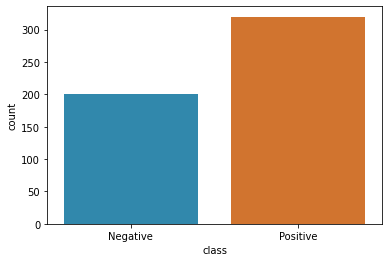

In [55]:
sns.countplot(data=diabetes_df, x='class',
              palette=['#1d91c0', "#ec7014"])

<AxesSubplot:xlabel='gender', ylabel='count'>

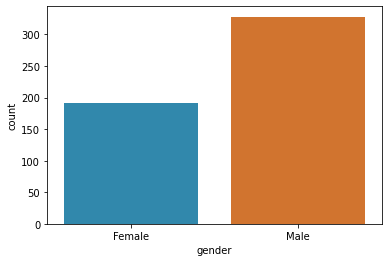

In [56]:
sns.countplot(data=diabetes_df, x='gender',
              palette=['#1d91c0', "#ec7014"])

In [58]:
diabetes_df_new = diabetes_df.drop('gender', axis=1)

<AxesSubplot:>

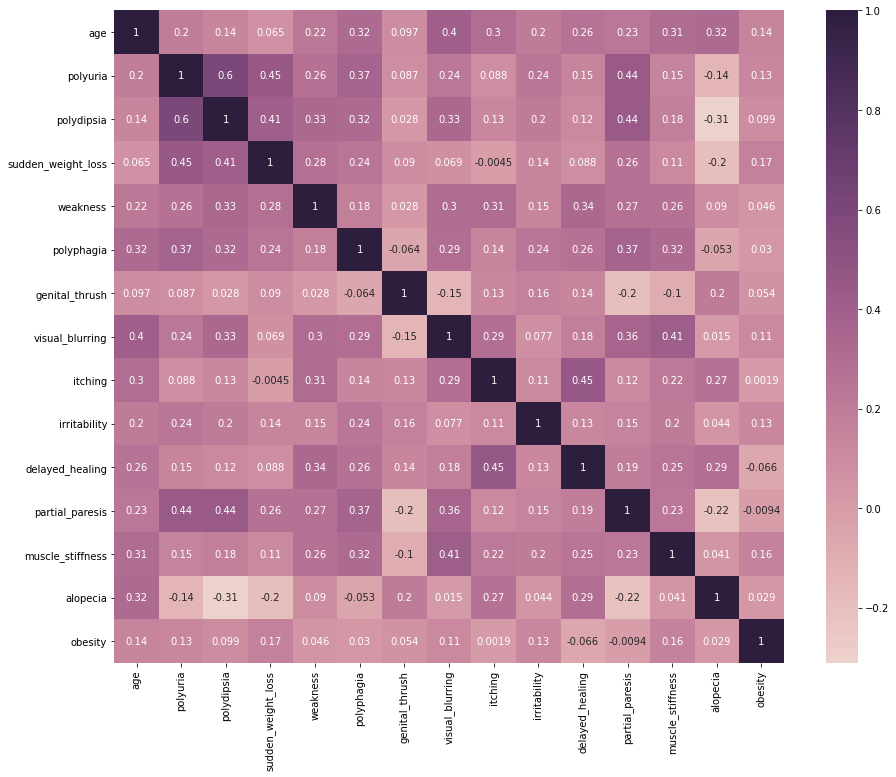

In [62]:
# check correlations between variables
corr_wine = diabetes_df_new.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_wine, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

#### 5. Feature engineering

In [88]:
ft_cols = diabetes_df.drop('gender', axis=1).columns[diabetes_df.columns.get_loc('age'): diabetes_df.drop('gender', axis=1).columns.get_loc('obesity')+1].tolist()

In [89]:
# check mutual information (importance) of each feature
X = diabetes_df_new.drop(['class'], axis=1)
y = diabetes_df_new['class']
importance = mutual_info_classif(X, y, random_state=42)
df_importance = pd.DataFrame({'features': ft_cols, 'importance': importance.round(2)})
df_importance

,features,importance
0,age,0.12
1,polyuria,0.23
2,polydipsia,0.24
3,sudden_weight_loss,0.11
4,weakness,0.03
5,polyphagia,0.06
6,genital_thrush,0.00
7,visual_blurring,0.02
8,itching,0.00
9,irritability,0.06


<AxesSubplot:xlabel='importance', ylabel='features'>

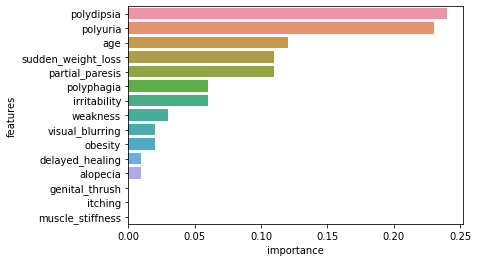

In [90]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

#### 6. Model selection and evaluation

#### 7. Conclusions